In [10]:
print("helo")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os

helo


In [5]:
%pip install yfinance -q

Note: you may need to restart the kernel to use updated packages.


Example Pulling of HDFC Stock Price

In [11]:
msft=yf.Ticker("MSFT")

In [13]:

hist=msft.history(start='2020-12-24', end='2021-12-30')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-24 00:00:00-05:00,215.231053,217.359843,215.017201,216.523880,10550600,0.0,0.0
2020-12-28 00:00:00-05:00,218.176365,219.712204,216.786342,218.672119,17933500,0.0,0.0
2020-12-29 00:00:00-05:00,219.984364,220.830042,217.330675,217.884735,17403200,0.0,0.0
2020-12-30 00:00:00-05:00,218.934541,219.323369,215.279643,215.483765,20272300,0.0,0.0
2020-12-31 00:00:00-05:00,215.503218,216.766885,213.539675,216.203094,20942100,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-22 00:00:00-05:00,321.798635,327.003478,319.299145,326.601624,24831500,0.0,0.0
2021-12-23 00:00:00-05:00,326.160519,329.728450,326.140926,328.062103,19617800,0.0,0.0
2021-12-27 00:00:00-05:00,328.816830,335.697831,328.787425,335.668427,19947000,0.0,0.0


In [15]:
hist.to_csv("MSFT.csv",index=False)

In [19]:
pd.read_csv('MSFT.csv')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,215.231053,217.359843,215.017201,216.523880,10550600,0.0,0.0
1,218.176365,219.712204,216.786342,218.672119,17933500,0.0,0.0
2,219.984364,220.830042,217.330675,217.884735,17403200,0.0,0.0
3,218.934541,219.323369,215.279643,215.483765,20272300,0.0,0.0
4,215.503218,216.766885,213.539675,216.203094,20942100,0.0,0.0
...,...,...,...,...,...,...,...
250,321.798635,327.003478,319.299145,326.601624,24831500,0.0,0.0
251,326.160519,329.728450,326.140926,328.062103,19617800,0.0,0.0
252,328.816830,335.697831,328.787425,335.668427,19947000,0.0,0.0
253,336.354556,337.001489,333.580612,334.492188,15661500,0.0,0.0


<Axes: xlabel='Date'>

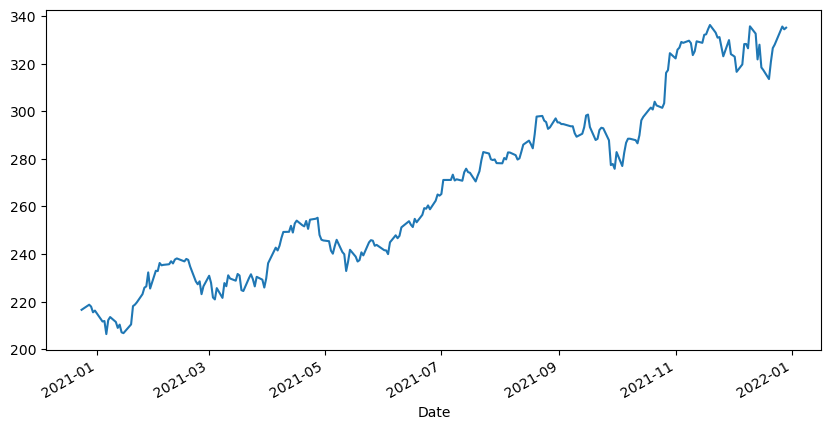

In [14]:
# pd.DataFrame(hist)
hist['Close'].plot(figsize=(10,5))

In [7]:
# !pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Scrape Twitter Data


In [8]:
data=pd.read_csv('.\Twitter\AMZN.csv').head()
data
# pd.DataFrame(data)


,date,time,tweet,retweets_count,likes_count,LEN
0,2021/12/30,18:53:58,@BeaglierCap I'll take $AMZN over $GOOG by an ...,1,1,3
1,2021/12/30,18:42:09,I have been working on trading for 3 years. Th...,0,0,3
2,2021/12/30,18:39:19,@Mitesh_Khatri1 @saxena_puru $SHOP and $AMZN w...,0,0,3
3,2021/12/30,18:35:00,@ShockIndustry @krystalball Have you forgotten...,0,1,1
4,2021/12/30,18:30:03,"Buying $AMZN calls if price gets around $3,300...",0,2,1


In [7]:
# !pip install demoji
import demoji
import re
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
import attr
import nltk
# !pip show nltk.corpus
# nltk.download('all')

In [8]:
# This function is used to pass the POS tage for each word passed through clean_text function
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [9]:
# Cleaning tweets
# import nltk
def clean_text(text):
    # Initialization the twitter tokenizer
    tk = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True) 
    # Initialization the lemmatizer
    lemmatizer = WordNetLemmatizer()  
    # Trying to avoid deleting the negative verbs as it affects the meaning of the tweets.
    stop_words = stopwords.words('english') + ["i'll","i'm", "should", "could"]
    negative_verbs = [ "shan't",'shouldn',"shouldn't",'wasn','weren','won','wouldn','aren','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn','mustn',"mustn't",'needn',"needn't","wouldn't","won't","weren't","wasn't","couldn","not","nor","no","mightn't","isn't","haven't","hadn't","hasn't","didn't","doesn't","aren't","don't","couldn't","never"]
    stop_words =[word for word in stop_words if word not in negative_verbs ] 
    
    # Lowering tweets
    lower_tweet = text.lower() 
    # Removing hashtag and cashtag symbols
    tweet = re.sub(r"[#$]"," ",lower_tweet)
    # Removing links from tweets
    tweet = re.sub(r"https?:\/\/.*[\r\n]*"," ", tweet)
    # Translating emojies into thier descriptions
    tweet = demoji.replace_with_desc(tweet)
    # removing numerical values
    tweet = re.sub(r"[0-9]|-->","",tweet)
    # Tokenize the tweets by twitter tokenzier.
    tweet = tk.tokenize(tweet)
    # Choosing the words that don't exist in stopwords, thier lengths are more than 2 letters and then lemmatize them.
    tweet = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet if word not in stop_words and word not in string.punctuation and len(word)>2 and "." not in word]
    # return the tokens in one sentence 
    tweet = " ".join(tweet)
    
    return tweet

In [32]:
tweets = pd.read_csv(".\Twitter\MSFT.csv")
tweets['cleaned'] = tweets["tweet"].apply(lambda row:clean_text(row))
tweets.to_csv("CleanedNTweets.csv",index=False)
# pd.DataFrame(pd.read_csv("ExampleTweets.csv"))

SENTIMENT ANALYSIS


In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax



c:\Users\91629\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

# 
# TF
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)

c:\Users\91629\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91629\.cache\huggingface\hub\models--cardiffnlp--twitter-xlm-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
All model checkpoint layers were used when initializing TFXLMRob

('cardiffnlp/twitter-xlm-roberta-base-sentiment\\tokenizer_config.json',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment\\special_tokens_map.json',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment\\sentencepiece.bpe.model',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment\\added_tokens.json',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment\\tokenizer.json')

In [37]:
def polarity(text):
    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    
    # Print labels and scores
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    l = config.id2label[ranking[0]]
    # plrty = -1 if l == "Negative" else 1 if l == "Positive" else 0 
    if l=='negative':
        plrty=-1
    elif l=='positive':
        plrty=1
    else:
        plrty=0
    s = np.round(float(scores[ranking[0]]), 4)
    return (l,plrty)

In [ ]:
# example = pd.read_csv(".\Twitter\TEMP.csv")


In [50]:
tweets=pd.read_csv('CleanedNTweets.csv')
tweets['label'],tweets['Polarity'] = zip(*tweets['cleaned'].apply(lambda txt:polarity(txt) ))
tweets.to_csv("polarizedTweets.csv",index=False)

In [51]:
pd.read_csv('polarizedTweets.csv')

,date,time,tweet,retweets_count,likes_count,LEN,cleaned,label,Polarity
0,2021/12/30,18:16:58,4/ Apple $APPL will surpass a $3 trillion mark...,1,5,2,apple appl surpass trillion market cap microso...,neutral,0
1,2021/12/30,17:58:00,$MSFT $AAPL $AMZN looks shaky?€?.obvious minor...,0,0,3,msft aapl amzn look shaky obvious minor pull b...,positive,1
2,2021/12/30,17:19:24,$MSFT end of year dump? ????,0,0,1,msft end year dump,negative,-1
3,2021/12/30,17:17:01,$MSFT .. whoops ????????,0,0,1,msft whoop,negative,-1
4,2021/12/30,16:59:44,????DAILY RECAP???? (12/29/21 - 12/30/21) - M...,0,7,3,daily recap make profitable trade msft tgt rok...,neutral,0
...,...,...,...,...,...,...,...,...,...
34790,2020/12/24,22:38:31,@zerohedge History will repeat $msft.. look at...,2,0,3,history repeat msft look thing googl baba,neutral,0
34791,2020/12/24,21:48:53,@Invest4decades I haven?€?t had much of a chan...,0,1,2,haven much chance deep dive like idea mdb rela...,neutral,0
34792,2020/12/24,21:29:48,Xmas Eve? $MSFT sends you holiday greetings wi...,0,2,1,xmas eve msft sends holiday greeting update li...,neutral,0
34793,2020/12/24,20:36:07,Apple had a $350B market cap when Tim Cook bec...,2,56,3,apple market cap tim cook become ceo year late...,negative,-1


In [5]:
polar=pd.read_csv('polarizedTweets.csv')
ptweets=polar.loc[:,['date','Polarity']]
ptweets.head()

,date,Polarity
0,2021/12/30,0
1,2021/12/30,1
2,2021/12/30,-1
3,2021/12/30,-1
4,2021/12/30,0


In [6]:
# Change the date format to match with the next csv file date format
ptweets['date'] =pd.to_datetime(ptweets['date'],infer_datetime_format=True)
ptweets['date'] =pd.to_datetime(ptweets['date'].dt.strftime("%m/%d/%y"))

# Aggregate the tweets polarization by avergae, sum and counts 
Pol_df = pd.DataFrame(ptweets.groupby('date')['Polarity'].mean())
Pol_df.rename(columns={"Polarity":"P_mean"},inplace=True)
Pol_df['P_sum'] = ptweets.groupby('date')['Polarity'].sum()
Pol_df['twt_count'] = ptweets.groupby('date')['Polarity'].count()
Pol_df.head()

C:\Users\91629\AppData\Local\Temp\ipykernel_3820\1858329282.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ptweets['date'] =pd.to_datetime(ptweets['date'],infer_datetime_format=True)
C:\Users\91629\AppData\Local\Temp\ipykernel_3820\1858329282.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ptweets['date'] =pd.to_datetime(ptweets['date'].dt.strftime("%m/%d/%y"))


,P_mean,P_sum,twt_count
date,,,
2020-12-24,-0.333333,-2,6
2020-12-25,-0.166667,-3,18
2020-12-26,0.000000,0,21
2020-12-27,0.080000,2,25
2020-12-28,-0.150538,-14,93


In [7]:
nflx_df = pd.read_csv("MSFT.csv")
nflx_df.rename(columns={"Date":"date"},inplace=True)
nflx_df['date'] = pd.to_datetime(nflx_df['date'],infer_datetime_format=True)
nflx_df.set_index("date")
# Adding the polarization column in the netflix dataframe.
final_df = nflx_df.join(Pol_df,on='date',how="inner")
final_df.head()

C:\Users\91629\AppData\Local\Temp\ipykernel_3820\2018744374.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nflx_df['date'] = pd.to_datetime(nflx_df['date'],infer_datetime_format=True)


,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Goal II: Open t+1 - Open t,Goal II: Open t+1 - Close t,P_mean,P_sum,twt_count
0,2020-12-28,224.449997,226.029999,223.020004,224.960007,222.629654,17933500.0,NaN,1.0,1,-0.150538,-14,93
1,2020-12-29,226.309998,227.179993,223.580002,224.149994,221.828049,17403200.0,NaN,-1.0,1,-0.153846,-10,65
2,2020-12-30,225.229996,225.630005,221.470001,221.679993,219.383621,20272300.0,NaN,-1.0,1,-0.160000,-8,50
3,2020-12-31,221.699997,223.000000,219.679993,222.419998,220.115967,20942100.0,NaN,1.0,1,-0.302632,-23,76
4,2021-01-04,222.529999,223.000000,214.809998,217.690002,215.434967,37130100.0,NaN,-1.0,-1,-0.127660,-6,47


In [8]:
final_df.to_csv("FinalMSTF.csv",index=False)

In [12]:
pd.read_csv('FinalMSTF.csv')

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Goal II: Open t+1 - Open t,Goal II: Open t+1 - Close t,P_mean,P_sum,twt_count
0,2020-12-28,224.449997,226.029999,223.020004,224.960007,222.629654,17933500.0,NaN,1.0,1,-0.150538,-14,93
1,2020-12-29,226.309998,227.179993,223.580002,224.149994,221.828049,17403200.0,NaN,-1.0,1,-0.153846,-10,65
2,2020-12-30,225.229996,225.630005,221.470001,221.679993,219.383621,20272300.0,NaN,-1.0,1,-0.160000,-8,50
3,2020-12-31,221.699997,223.000000,219.679993,222.419998,220.115967,20942100.0,NaN,1.0,1,-0.302632,-23,76
4,2021-01-04,222.529999,223.000000,214.809998,217.690002,215.434967,37130100.0,NaN,-1.0,-1,-0.127660,-6,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2021-12-23,332.750000,336.390015,332.730011,334.690002,333.999390,19617800.0,NaN,1.0,1,-0.102564,-12,117
251,2021-12-27,335.459991,342.480011,335.429993,342.450012,341.743378,19947000.0,NaN,1.0,1,-0.046875,-6,128
252,2021-12-28,343.149994,343.809998,340.320007,341.250000,340.545837,15661500.0,NaN,-1.0,1,-0.183333,-22,120
253,2021-12-29,341.299988,344.299988,339.679993,341.950012,341.244415,15042000.0,NaN,1.0,-1,-0.260163,-32,123
